In [13]:
import pandas as pd
file = "worldbank_gapminder.csv"
df = pd.read_csv(file)
print(df.head())

   Unnamed: 0      country continent  year  lifeExp       pop   gdpPercap
0           1  Afghanistan      Asia  1952   28.801   8425333  779.445314
1           2  Afghanistan      Asia  1957   30.332   9240934  820.853030
2           3  Afghanistan      Asia  1962   31.997  10267083  853.100710
3           4  Afghanistan      Asia  1967   34.020  11537966  836.197138
4           5  Afghanistan      Asia  1972   36.088  13079460  739.981106


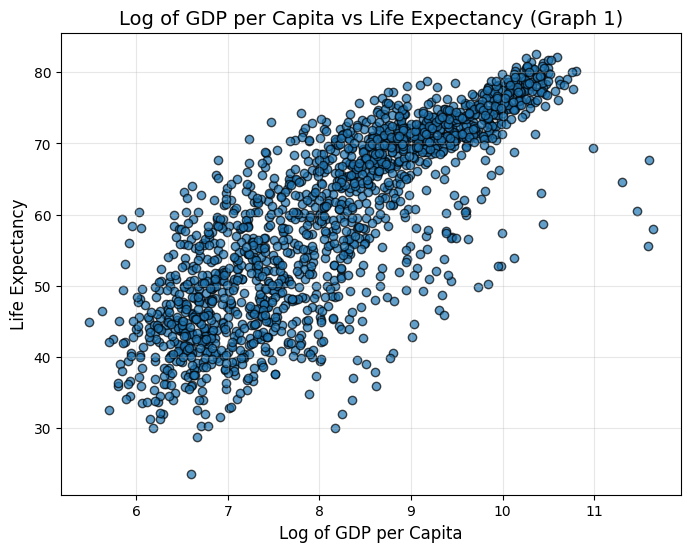

In [7]:
import numpy as np
import matplotlib.pyplot as plt
df['log_gdpPercap'] = np.log(df['gdpPercap'])
plt.figure(figsize=(8, 6))
plt.scatter(df['log_gdpPercap'], df['lifeExp'], alpha=0.7, edgecolor='k')
plt.title('Log of GDP per Capita vs Life Expectancy (Graph 1)', fontsize=14)
plt.xlabel('Log of GDP per Capita', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

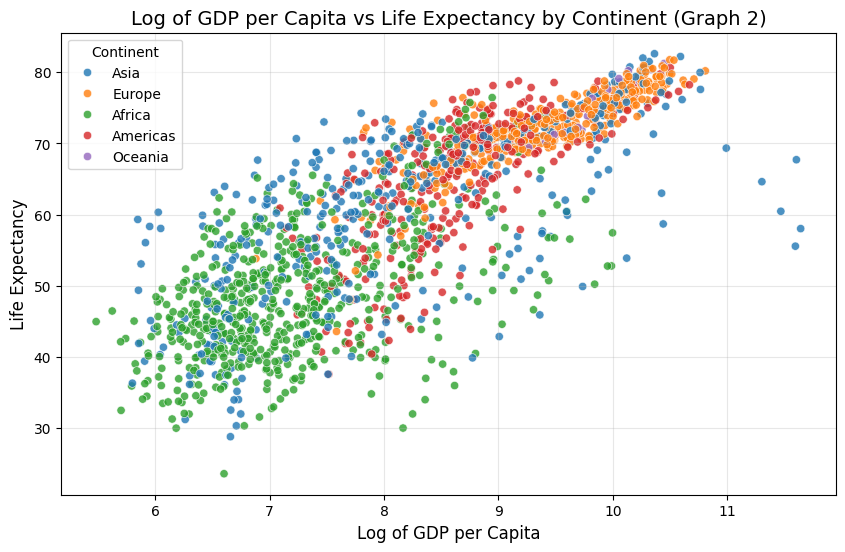

In [12]:

import seaborn as sns

df['log_gdpPercap'] = np.log(df['gdpPercap'])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='log_gdpPercap',
    y='lifeExp',
    hue='continent',
    palette='tab10',
    alpha=0.8
)

plt.title('Log of GDP per Capita vs Life Expectancy by Continent (Graph 2)', fontsize=14)
plt.xlabel('Log of GDP per Capita', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.legend(title='Continent', fontsize=10)
plt.grid(alpha=0.3)
plt.show()


In [10]:
import altair as alt
import numpy as np

df = pd.read_csv('worldbank_gapminder.csv')
df['log_gdpPercap'] = np.log(df['gdpPercap'])
scatterplot = alt.Chart(df).mark_circle(size=60).encode(
    x=alt.X('log_gdpPercap', title='Log of GDP per Capita'),
    y=alt.Y('lifeExp', title='Life Expectancy'),
    color=alt.Color('continent', legend=alt.Legend(title='Continent')),
    tooltip=['continent', 'country', 'year']
).properties(
    title='Log of GDP per Capita vs Life Expectancy by Continent (Graph 3)',
    width=800,
    height=500
).interactive()

# Display the plot
scatterplot.show()


alt.Chart(...)

#### When looking at graph 1, it's clear that there is a linear relationship between GPD and Life Expectancy, although not perfectly linear as there are a couple of noticeable outliers. When looking at graph 3 there are immediately 2 noticeable trends. Africa in blue and Asia in red. Africa seems to be concentrated on the lower bottom left indicating lower GDP per capita and life expectancy but Asia (Specifically Kuwait) seems to contain most of the outliers with high GDP per capita but lower life expectancy than the other contients. Europe seems to be doing the best with most of their countries having an above average GDP per capita and high life expectancy. Oceania and the Americas go slightly lower than Europe but still present a strong linear relationship. In conclusion GDP per capita and life expectancy do show a strong linear relationship, it's still not perfect and potentially many other factors can influence life expectancy such as governance, cultural practices, and healthcare efficiency.

In [6]:
print(df.dtypes)

Unnamed: 0      int64
country        object
continent      object
year            int64
lifeExp       float64
pop             int64
gdpPercap     float64
dtype: object


In [9]:
# Convert columns with 'object' type to 'category' using dot notation
df.continent = df.continent.astype('category')
df.country = df.country.astype('category')  
print(df.dtypes)


Unnamed: 0       int64
country       category
continent     category
year             int64
lifeExp        float64
pop              int64
gdpPercap      float64
dtype: object


In [11]:
na_values = df.isnull().sum()
print(na_values)

Unnamed: 0    0
country       0
continent     0
year          0
lifeExp       0
pop           0
gdpPercap     0
dtype: int64


In [12]:
df.shape

(1704, 7)

In [19]:
df.iloc[2]['lifeExp']

np.float64(31.997)

In [21]:
df['gdpPercap'].max()

np.float64(113523.1329)

In [25]:
mean_life = df['lifeExp'].mean()
std_life = df['lifeExp'].std()
print(mean_life, std_life)

59.474439366197174 12.917107415241192


In [26]:
europe_df = df.loc[df['continent'] == 'Europe']
print(europe_df.head())

    Unnamed: 0  country continent  year  lifeExp      pop    gdpPercap
12          13  Albania    Europe  1952    55.23  1282697  1601.056136
13          14  Albania    Europe  1957    59.28  1476505  1942.284244
14          15  Albania    Europe  1962    64.82  1728137  2312.888958
15          16  Albania    Europe  1967    66.22  1984060  2760.196931
16          17  Albania    Europe  1972    67.69  2263554  3313.422188


In [31]:
europe_df.shape

(360, 7)

##### Creating an even smaller dataset--called small_europe--from europe_df with only rows in 2002 and from Germany and Austria and France.

In [32]:
small_europe = europe_df[
    (europe_df['year'] == 2002) &
    ((europe_df['country'] == 'Germany') |
     (europe_df['country'] == 'Austria') |
     (europe_df['country'] == 'France'))
]

print(small_europe)



     Unnamed: 0  country continent  year  lifeExp       pop    gdpPercap
82           83  Austria    Europe  2002    78.98   8148312  32417.60769
538         539   France    Europe  2002    79.59  59925035  28926.03234
574         575  Germany    Europe  2002    78.67  82350671  30035.80198


***

##### The country in small_europe has the highest life expectancy?

#### France 

In [39]:
max_life_exp_index = small_europe['lifeExp'].idxmax()

country_with_max_life_exp = small_europe.loc[max_life_exp_index, 'country']

print(country_with_max_life_exp)


France


***

##### The mean and SD life expectancy in Africa excluding Zambia and Tunisia


#### The mean is 48.69 and SD is 9.03 excluding Zambia and tunisia

In [40]:
africa_excluding = df[
    (df['continent'] == 'Africa') &
    (~df['country'].isin(['Zambia', 'Tunisia']))
]

# Calculate mean and standard deviation
mean_lifeExp = africa_excluding['lifeExp'].mean()
std_lifeExp = africa_excluding['lifeExp'].std()

print(mean_lifeExp)
print(std_lifeExp) 


48.68559666666667
9.03331312960448


##### Creatingte a new column called high_exp that is 1 if lifeExp is greater than 75 and 0 otherwise.

In [41]:
df['high_exp'] = (df['lifeExp'] > 75).astype(int)
print(df.head())


   Unnamed: 0      country continent  year  lifeExp       pop   gdpPercap  \
0           1  Afghanistan      Asia  1952   28.801   8425333  779.445314   
1           2  Afghanistan      Asia  1957   30.332   9240934  820.853030   
2           3  Afghanistan      Asia  1962   31.997  10267083  853.100710   
3           4  Afghanistan      Asia  1967   34.020  11537966  836.197138   
4           5  Afghanistan      Asia  1972   36.088  13079460  739.981106   

   high_exp  
0         0  
1         0  
2         0  
3         0  
4         0  


##### Subsetting the data to create a small dataset with only countries with high life expectancy rows called high_df.


In [43]:
high_df = df[df['high_exp'] == 1]
print(high_df.head())

    Unnamed: 0    country continent  year  lifeExp       pop     gdpPercap  \
22          23    Albania    Europe  2002   75.651   3508512   4604.211737   
23          24    Albania    Europe  2007   76.423   3600523   5937.029526   
59          60  Argentina  Americas  2007   75.320  40301927  12779.379640   
67          68  Australia   Oceania  1987   76.320  16257249  21888.889030   
68          69  Australia   Oceania  1992   77.560  17481977  23424.766830   

    high_exp  
22         1  
23         1  
59         1  
67         1  
68         1  


In [45]:
low_df = df[df['lifeExp'] <= 75]
print(low_df.head())

   Unnamed: 0      country continent  year  lifeExp       pop   gdpPercap  \
0           1  Afghanistan      Asia  1952   28.801   8425333  779.445314   
1           2  Afghanistan      Asia  1957   30.332   9240934  820.853030   
2           3  Afghanistan      Asia  1962   31.997  10267083  853.100710   
3           4  Afghanistan      Asia  1967   34.020  11537966  836.197138   
4           5  Afghanistan      Asia  1972   36.088  13079460  739.981106   

   high_exp  
0         0  
1         0  
2         0  
3         0  
4         0  


##### The mean gdpPercap of in the high_df and mean gdpPercap in low_df.

#### High: 24704.29, Low: 5239.11

In [49]:
mean_high = high_df['gdpPercap'].mean()
mean_low = low_df['gdpPercap'].mean()
print(mean_high, mean_low)

24704.287164069363 5239.108861529393


##### Calculating the mean gdpPercap for countrie.s with lifeExp greater than 75 and for countries with lifeExp less than or equal to 75.

In [51]:
mean_gdpPercap = {
    "lifeExp > 75": df[df['lifeExp'] > 75]['gdpPercap'].mean(),
    "lifeExp <= 75": df[df['lifeExp'] <= 75]['gdpPercap'].mean()
}
print(mean_gdpPercap)

{'lifeExp > 75': np.float64(24704.287164069363), 'lifeExp <= 75': np.float64(5239.108861529393)}


##### Using normalized crosstabs to display, within each continent, the percentage of rows that are considered high life expectancy (high_exp == 1).

In [52]:
crosstab = pd.crosstab(df['continent'], df['high_exp'], normalize='index') * 100
crosstab.columns = ['Low Life Expectancy (0)', 'High Life Expectancy (1)']
print(crosstab)

           Low Life Expectancy (0)  High Life Expectancy (1)
continent                                                   
Africa                   99.679487                  0.320513
Americas                 90.666667                  9.333333
Asia                     91.666667                  8.333333
Europe                   71.944444                 28.055556
Oceania                  62.500000                 37.500000


##### The percentage of data from the Americas have high life expectancy?

#### 9.33%

In [53]:
americas_data = df[df['continent'] == 'Americas']
percentage_high_lifeExp = (americas_data['high_exp'].sum() / len(americas_data)) * 100
print(percentage_high_lifeExp)

9.333333333333334


#### Note: I had to create a new kernal because I couldn't get Altair to run
##### !pip install ipykernel
##### python -m ipykernel install --user --name=myenv --display-name "Python (myenv)"